In [3]:
import os
import sys

import numpy as np
import matplotlib.pyplot as plt
import xarray as xr
import seaborn as sns

from sqgtools import XSQGTurb

In [2]:
sys.path.append("..")
from rcgfd import RCDataset, NVARDataset, plot_ke_relerr

In [4]:
plt.style.use("./rc-gfd.mplstyle")

In [5]:
fig_dir = "../figures"
if not os.path.isdir(fig_dir):
    os.makedirs(fig_dir)

In [6]:
rcd = RCDataset(
    n_sub=(1,4,16),
    cost_terms=[
        {"nrmse": 1, "spectral":0.001},
        {"nrmse": 1, "spectral":0.0001}
    ],
)

In [7]:
rds = rcd()

In [8]:
nvd = NVARDataset(
    n_sub=(1,4,16),
    n_lag=(1,),
)

In [10]:
nds = nvd()

In [ ]:
gamma = {}

/contrib/Tim.Smith/miniconda3/envs/ddc10/lib/python3.10/site-packages/dask/core.py:119: RuntimeWarning: overflow encountered in square
  return func(*(_execute_task(a, cache) for a in args))
/contrib/Tim.Smith/miniconda3/envs/ddc10/lib/python3.10/site-packages/dask/core.py:119: RuntimeWarning: invalid value encountered in divide
  return func(*(_execute_task(a, cache) for a in args))
/contrib/Tim.Smith/miniconda3/envs/ddc10/lib/python3.10/site-packages/numpy/core/fromnumeric.py:86: RuntimeWarning: invalid value encountered in reduce
  return ufunc.reduce(obj, axis, dtype, out, **passkwargs)
/contrib/Tim.Smith/miniconda3/envs/ddc10/lib/python3.10/site-packages/numpy/core/fromnumeric.py:86: RuntimeWarning: overflow encountered in reduce
  return ufunc.reduce(obj, axis, dtype, out, **passkwargs)
/contrib/Tim.Smith/miniconda3/envs/ddc10/lib/python3.10/site-packages/dask/core.py:119: RuntimeWarning: invalid value encountered in divide
  return func(*(_execute_task(a, cache) for a in args))


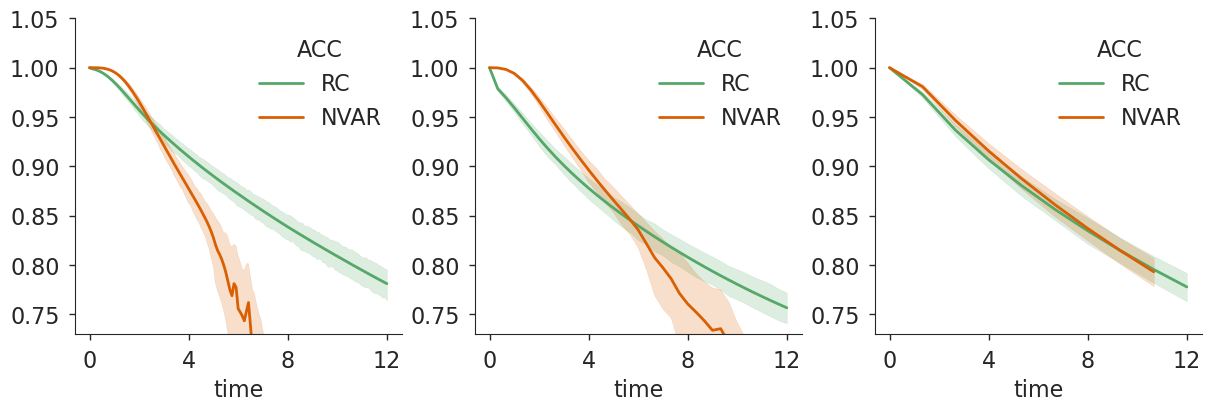

In [15]:
fig, axs = plt.subplots(1,3, figsize=(12,4), sharex=True, constrained_layout=True)

metric = "acc"
for n_sub, ax in zip(rds.n_sub.values, axs):
    for xds, label in zip([rds, nds], ["RC", "NVAR"]):
        
        if "experiment" in xds.dims:
            gamma = 1e-4 if n_sub>1 else 1e-3
            xds = xds.sel(
                experiment=f"nrmse1.0e+00-spectral{gamma:1.1e}"
            )
            
        plotme = xds.sel(n_sub=n_sub)
        plotme = plotme[metric].to_dataset()
        df = plotme.to_dataframe().reset_index()
        sns.lineplot(
            data=df,
            x="time",
            y=metric,
            ax=ax,
            label=label,# r"$N_{sub} = %d$" % n_sub,
            errorbar="ci",
        )
        
    ax.set(ylabel="")
    ax.legend(title=xds[metric].label)
    hours = np.array([0,4,8,12])
    seconds = hours*3600
    ax.set(xticks=seconds, xticklabels=hours)
    ax.set(ylim=[0.73, 1.05])